# Linear Regression for gold price price prdiction<br>
#### Lakshya Garg<br> 211000027

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### Loaded Libraries

In [2]:
custom_date_parser = lambda x: datetime.strptime(x,"%d-%m-%Y")
# Custom Parser to read date time 

In [3]:
daily=pd.read_csv('gold_monthly.csv',parse_dates=['Date'],date_parser=custom_date_parser)
print(daily.dtypes)
daily

Date           datetime64[ns]
Open                   object
High                   object
Low                    object
Close*                 object
Adj Close**            object
dtype: object


,Date,Open,High,Low,Close*,Adj Close**
0,2022-12-30,"1,817.00","1,822.30","1,816.80","1,819.70","1,819.70"
1,2022-12-01,1768.7,1826.3,1764.3,1819.7,1819.7
2,2022-10-31,1630.8,1778.9,1615.1,1746,1746
3,2022-09-30,1667.2,1728,1622.8,1635.9,1635.9
4,2022-08-31,1707.9,1728.1,1620.4,1662.4,1662.4
5,2022-07-31,1763.9,1804.9,1708.5,1712.8,1712.8
6,2022-06-30,1795.5,1806.1,1679.8,1762.9,1762.9
7,2022-05-31,1831,1875.6,1801,1804.1,1804.1
8,2022-03-31,1935,1997.1,1872.9,1909.3,1909.3
9,2022-03-01,1908.3,2072,1893.5,1949.2,1949.2


### Data Pre-processing <br>
Converting object(string) data type to float

In [4]:
for i in daily.columns:
    if i=='Date':
        continue
    else:
        daily[i]=daily[i].str.replace(',','')
        daily[i]=daily[i].astype(float)

# daily['High']=daily['High'].astype(float)
# daily['Date'].astype({'Date':int})
print(daily.dtypes)
daily

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
dtype: object


,Date,Open,High,Low,Close*,Adj Close**
0,2022-12-30,1817.0,1822.3,1816.8,1819.7,1819.7
1,2022-12-01,1768.7,1826.3,1764.3,1819.7,1819.7
2,2022-10-31,1630.8,1778.9,1615.1,1746.0,1746.0
3,2022-09-30,1667.2,1728.0,1622.8,1635.9,1635.9
4,2022-08-31,1707.9,1728.1,1620.4,1662.4,1662.4
5,2022-07-31,1763.9,1804.9,1708.5,1712.8,1712.8
6,2022-06-30,1795.5,1806.1,1679.8,1762.9,1762.9
7,2022-05-31,1831.0,1875.6,1801.0,1804.1,1804.1
8,2022-03-31,1935.0,1997.1,1872.9,1909.3,1909.3
9,2022-03-01,1908.3,2072.0,1893.5,1949.2,1949.2


In [5]:
daily.sort_values('Date',ascending=True,inplace=True,ignore_index=True)
daily

,Date,Open,High,Low,Close*,Adj Close**
0,2022-01-01,1830.1,1852.7,1778.8,1795.0,1795.0
1,2022-02-01,1797.2,1972.5,1787.9,1899.4,1899.4
2,2022-03-01,1908.3,2072.0,1893.5,1949.2,1949.2
3,2022-03-31,1935.0,1997.1,1872.9,1909.3,1909.3
4,2022-05-31,1831.0,1875.6,1801.0,1804.1,1804.1
5,2022-06-30,1795.5,1806.1,1679.8,1762.9,1762.9
6,2022-07-31,1763.9,1804.9,1708.5,1712.8,1712.8
7,2022-08-31,1707.9,1728.1,1620.4,1662.4,1662.4
8,2022-09-30,1667.2,1728.0,1622.8,1635.9,1635.9
9,2022-10-31,1630.8,1778.9,1615.1,1746.0,1746.0


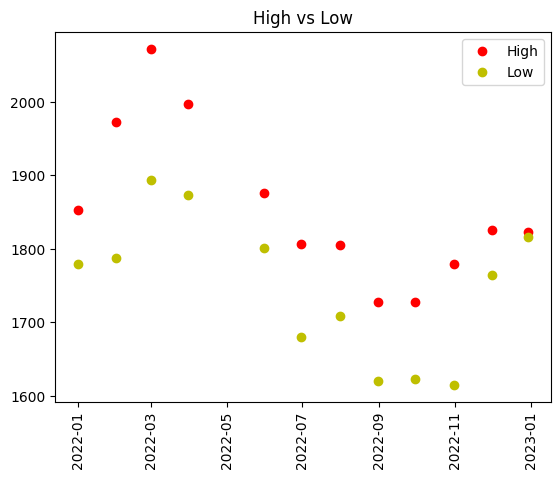

In [6]:
plt.plot(daily['Date'],daily['High'],'ro',label='High')
plt.plot(daily['Date'],daily['Low'],'yo',label='Low')
plt.xticks(rotation=90)
plt.title('High vs Low')
plt.legend(['High','Low'])
plt.show()


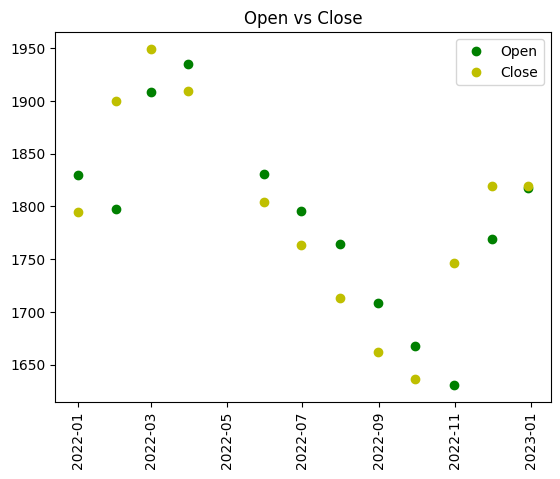

In [7]:
plt.plot(daily['Date'],daily['Open'],'go')
plt.plot(daily['Date'],daily['Close*'],'yo')
plt.xticks(rotation=90)
plt.title('Open vs Close')
plt.legend(['Open','Close'])
plt.show()

In [8]:
class LR:
    
    
    def __init__(self):
        pass    
        
    
    def fit_GD(self,X_train,y_train,epochs,alpha):
        cost_history=[]
        self.weights=np.ones(X_train.shape[1])
        new_weights=np.zeros(X_train.shape[1])
        self.bias=np.random.randint(np.min(y_train),np.max(y_train))
        for k in range(epochs):
            cost_history.append(self.MSE(y_train,self.predict(X_train)))
            # for i in range(X_train.shape[0]):
            new_weights=np.average((np.matmul(X_train,self.weights)+self.bias-y_train)*self.weights)
            # for i in range(X_train.shape[0]):
            new_bias=np.average((np.matmul(X_train,self.weights)+self.bias-y_train))

                
            # for j in range(X_train.shape[1]):
            self.weights-=(new_weights*alpha)
                # updating weights
            self.bias-=(alpha*new_bias)
                # updating bias
        cost_history.append(self.MSE(y_train,self.predict(X_train)))
        return cost_history
    
    def fit_SGD(self,X_train,y_train,epochs,alpha):
        cost_history=[]
        self.weights=np.ones(X_train.shape[1])
        new_weights=np.zeros(X_train.shape[1])
        self.bias=np.random.randint(np.min(y_train),np.max(y_train))
        for k in range(epochs):
            X_train_selected=[]
            y_train_selected=[]
            for i in range(X_train.shape[0]):
                key=np.random.randint(0,X_train.shape[0])
                X_train_selected.append(X_train.loc[key])
                y_train_selected.append(y_train.loc[key])
            cost_history.append(self.MSE(y_train_selected,self.predict(X_train_selected)))
            # for i in range(X_train.shape[0]):
            new_weights=np.average((np.matmul(X_train_selected,self.weights)+self.bias-y_train_selected)*self.weights)
            # for i in range(X_train.shape[0]):
            new_bias=np.average((np.matmul(X_train_selected,self.weights)+self.bias-y_train_selected))

                
            # for j in range(X_train.shape[1]):
            self.weights-=(new_weights*alpha)
                # updating weights
            self.bias-=(alpha*new_bias)
                # updating bias
        cost_history.append(self.MSE(y_train_selected,self.predict(X_train_selected)))
        return cost_history


    def fit_direct(self,X_train,y_train):
        X_train_orig=X_train
        X_train=np.hstack((X_train,np.ones((X_train.shape[0],1))))
        self.weights=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.bias=self.weights[-1]
        self.weights=self.weights[0:-1]
        return self.MSE(y_train,self.predict(X_train_orig))


    
    def predict(self,X_test):
        return np.matmul(X_test,self.weights)+self.bias
        
    
    def MSE(self,y_true,y_pred):
        a=y_true-y_pred
        return np.sum(a**2)/a.shape[0]
    # function for Mean Square Error Calculation 
    # It involves no loops it is faster (vectorized)

    def SSR(self,y_true,y_pred):
        a=y_true-y_pred
        return np.sum(a**2)
    
    def SST(self,y_true,y_pred):
        a=y_true-np.average(y_pred)
        return np.sum(a**2)
    
    def SSE(self,y_true,y_pred):
        return self.SST(y_true,y_pred)-self.SSR(y_true,y_pred)
    
    def R2(self,y_true,y_pred):
        return 1-self.SSR(y_true,y_pred)/self.SST(y_true,y_pred)
    
    
    
    


In [9]:
X_train=pd.DataFrame()
temp=[]
for index,i in enumerate(daily['Date']):
    temp.append(index)

X_train['Date']=pd.DataFrame(temp)
y_train=daily['High']
X_train.shape[0]
# y_train
# model.MSE(np.array([2.3,8.9]),np.array([9,8]))

12

In [10]:
model=LR()
graph_GD=model.fit_GD(X_train,y_train,  15,0.003)

In [11]:
y_pred=model.predict(X_train)

In [12]:
print("MSE: ",model.MSE(y_train,y_pred))
print("SSE: ",model.SSE(y_train,y_pred))
print("SSR: ",model.SSR(y_train,y_pred))
print("SST: ",model.SST(y_train,y_pred))
print("R2: ",model.R2(y_train,y_pred))



MSE:  42004.63475054053
SSE:  -0.037719250831287354
SSR:  504055.61700648634
SST:  504055.5792872355
R2:  -7.483153119380859e-08


Here R2 score megative indicates the regression is even worse than if we kept a a constant value the arithmetic mean

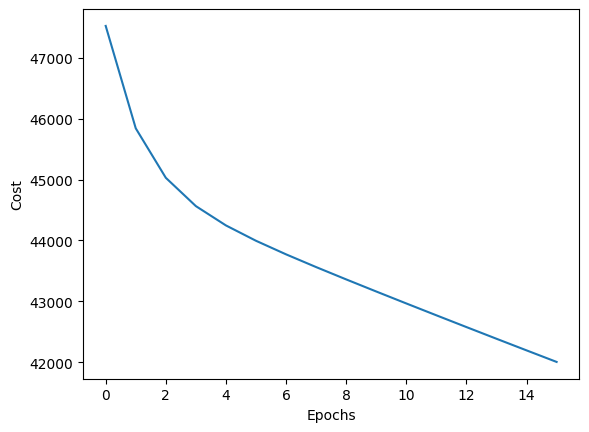

In [13]:
plt.plot(graph_GD)
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

In [14]:
graph_SGD=model.fit_SGD(X_train,y_train,15,0.003)

In [15]:
y_pred=model.predict(X_train)
print(model.MSE(y_train,y_pred))

14972.095042489731


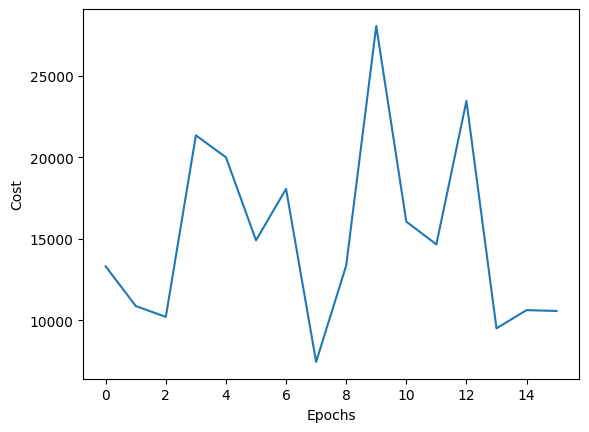

In [16]:
plt.plot(graph_SGD)
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

In [17]:
print("MSE: ",model.MSE(y_train,y_pred))
print("SSE: ",model.SSE(y_train,y_pred))
print("SSR: ",model.SSR(y_train,y_pred))
print("SST: ",model.SST(y_train,y_pred))
print("R2: ",model.R2(y_train,y_pred))


MSE:  14972.095042489731
SSE:  -50694.54143933731
SSR:  179665.14050987677
SST:  128970.59907053947
R2:  -0.39307052773795625


Here R2 score megative indicates the regression is even worse than if we kept a a constant value the arithmetic mean